# Задание 14. 

* Построить кластеризации, используя несколько разных «расстояний» и разные начальные центры (например, рандомные, крайние (≈ max/min по координатам, первые в списке, т.п.).
* Результат — на рисунке (точки разных кластеров изобразить разными цветами; отметить центры кластеров). Т.е. в итоге — не менее 4-х рисунков.
* Выводить также количество итераций, потребовавшихся для стабилизации кластеров в каждом из случаев.
* Например, можно брать k = 4 и, скажем, N ≈ 1000. Точки можно брать рандомно или с умыслом.

**Отчёт:** https://docs.google.com/document/d/1e59qpjuWCBy-5pgLz2Tvh-YtJYKJYu8L826pPHpOnmA/edit?usp=sharing

# Imports

In [1]:
from typing import List, Tuple, Callable
import random
from math import sqrt

import numpy as np
import matplotlib.pyplot as plt

# Solution

In [2]:
class Clusterisation:
    def __init__(self, points_to_clusters: List[int], centers: List[List[float]], iterations: int):
        self.points_to_clusters = points_to_clusters
        self.centers = centers
        self.iterations = iterations


def assign_points_to_clusters(points, centers, points_to_clusters, distance_function):
    changed = False
    new_points_to_clusters = []
    for i, point in enumerate(points):
        closest_center = min(range(len(centers)), key=lambda c: distance_function(centers[c], point))
        new_points_to_clusters.append(closest_center)
        if points_to_clusters[i] != closest_center:
            changed = True
    return new_points_to_clusters, changed


def update_centers(points, points_to_clusters, k):
    dimension = len(points[0])
    new_centers = [np.zeros(dimension) for _ in range(k)]
    counts = [0] * k
    for point, cluster in zip(points, points_to_clusters):
        new_centers[cluster] += point
        counts[cluster] += 1
    for i in range(k):
        if counts[i] > 0:
            new_centers[i] /= counts[i]
    return new_centers


def k_means_clustering(points: List[List[float]], k: int, distance_function: Callable[[List[float], List[float]], float]) -> Clusterisation:
    """
    Performs k-means clustering on a given set of points.

    Args:
    points (List[List[float]]): A list of points, each represented as a list of coordinates.
    k (int): The number of clusters to form.
    distance_function (Callable): A function to calculate the distance between two points.

    Returns:
    Clusterisation: A named tuple containing the cluster assignments, cluster centers, and number of iterations.
    """
    if k <= 0 or k > len(points):
        raise ValueError("k must be greater than 0 and less than or equal to the number of points")

    centers = random.sample(points, k)
    points_to_clusters = [-1] * len(points)
    changed = True
    iterations = 0

    while changed:
        changed = False
        points_to_clusters, changed = assign_points_to_clusters(points, centers, points_to_clusters, distance_function)
        centers = update_centers(points, points_to_clusters, k)
        iterations += 1

    return Clusterisation(points_to_clusters, centers, iterations)

# Experiment

In [3]:
def experiment(points: List, k: int, dist: Callable, title: str):
    clusterisation_result = k_means_clustering(points, k, dist)
    x, y = zip(*points)
    fig, ax = plt.subplots()
    
    # Scatter plot for points
    ax.scatter(x, y, c=clusterisation_result.points_to_clusters, label='Points')

    # Scatter plot for cluster centers
    centers_x, centers_y = zip(*clusterisation_result.centers)
    ax.scatter(centers_x, centers_y, c='red', marker='x', s=100, label='Cluster Centers')

    fig.suptitle(f'{title}, iterations: {clusterisation_result.iterations}')
    plt.legend()
    plt.show()


k = 5
dists = [(lambda p1, p2: sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2), 'sqrt((x1-y1)^2+(x2-y2)^2)'),
         (lambda p1, p2: 1 - (np.dot(p1, p2) / (np.linalg.norm(p1) * np.linalg.norm(p2))), 'cosine distance(p1, p2)'),
         (lambda p1, p2: abs(p1[0] - p2[0]) + abs(p1[1] - p2[1]), '|(x1-y1)|+|(x2-y2)|'),
         (lambda p1, p2: max(abs(p1[0] - p2[0]), abs(p1[1] - p2[1])), 'max(|(x1-y1)|,|(x2-y2)|)')]

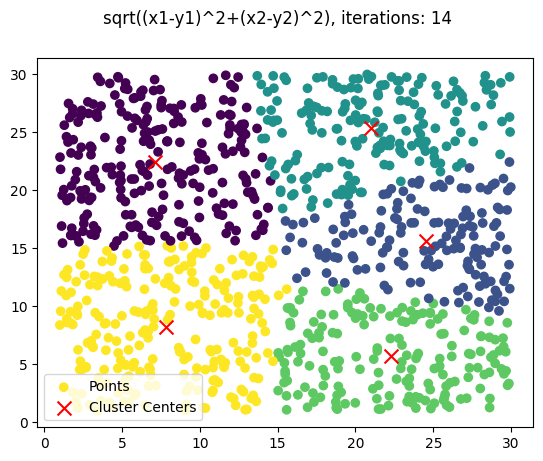

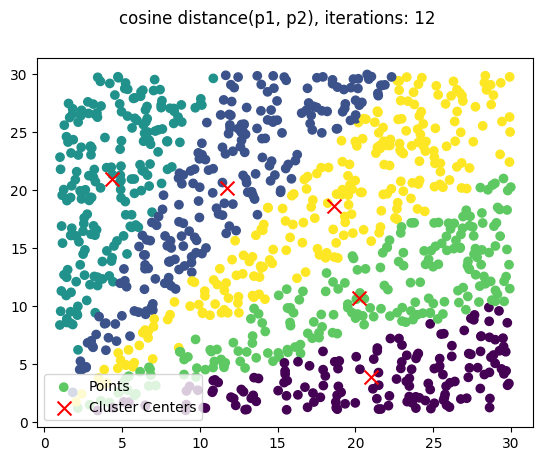

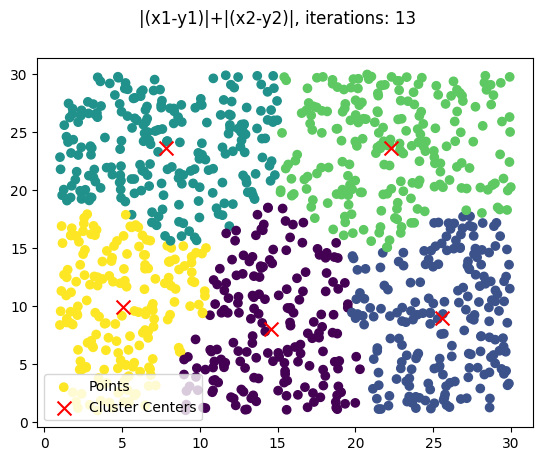

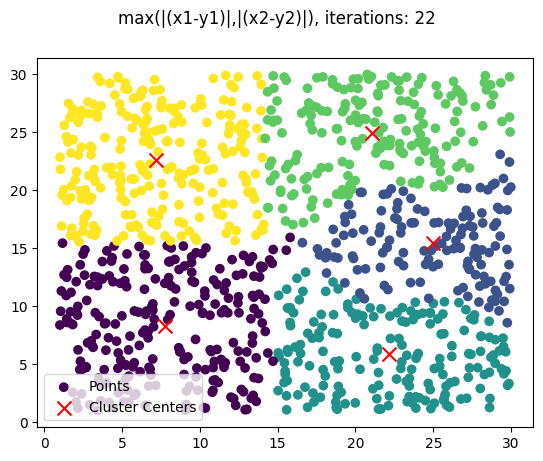

In [4]:
points = [(random.uniform(1, 30), random.uniform(1, 30)) for _ in range(1000)]

for dist in dists:
    experiment(points, k, dist[0], dist[1])

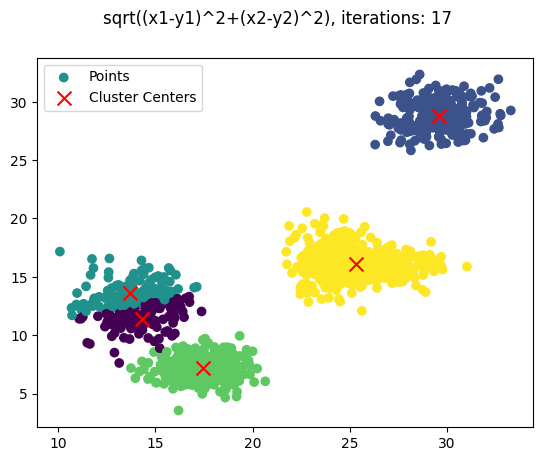

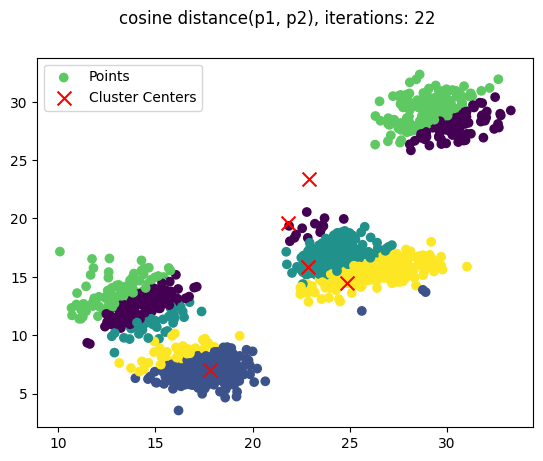

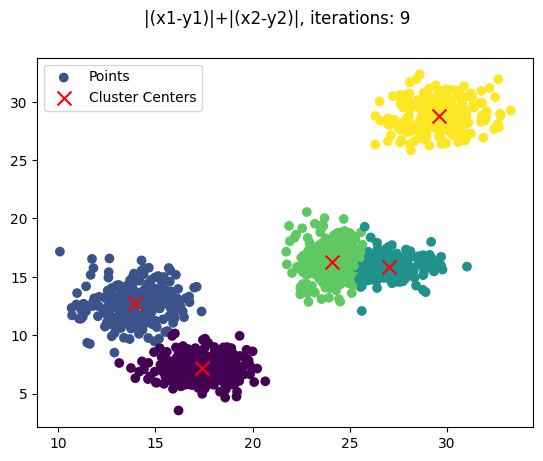

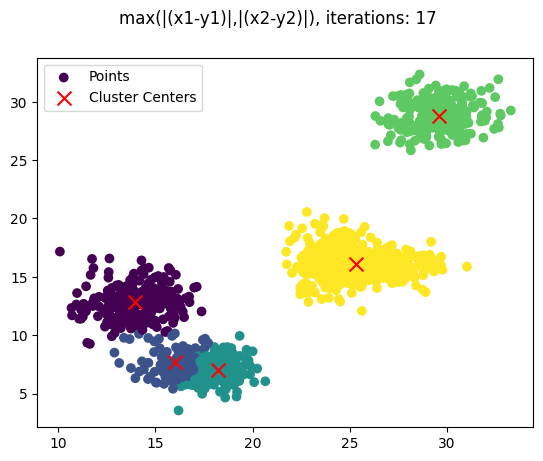

In [5]:
def generate_gaussian_clusters(num_clusters, num_points, mean_range, std_dev):
    points = []
    for _ in range(num_clusters):
        mean = np.random.uniform(mean_range[0], mean_range[1], 2)
        cov = np.diag(np.random.uniform(std_dev[0], std_dev[1], 2))
        cluster_points = np.random.multivariate_normal(mean, cov, num_points)
        points.extend(cluster_points)
    return points


num_points_per_cluster = 250
mean_range = (1, 30)
std_dev_range = (0.5, 2.5)
points = generate_gaussian_clusters(k, num_points_per_cluster, mean_range, std_dev_range)

for dist in dists:
    experiment(points, k, dist[0], dist[1])